# 01 - Setup

NAME = "Todsavad Tangtortan"
ID = "123012"

Your goal is to try to train and evaluate the PyTorch AlexNet model on the CIFAR-10 dataset. You can use Torch's torchvision module to load the data into PyTorch tensors.

Your lab report should have the following sections:
1. Introduction: the background and goals of the lab
2. Methods: what you did, what parameters you tried, and so on
3. Results: what were the results
4. Conclusion: what did you learn from the lab, and what might be the next steps

In the results section, be sure to show training and validation loss as a function of training epochs. You'll also want to show results on a separate test set and give some analysis of the errors the classifier makes on the test set.

In [1]:
import urllib
from PIL import Image

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, TensorDataset
from torch.optim import *
import torchvision
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import random
import warnings
warnings.filterwarnings("ignore")

from IPython.display import clear_output

os.environ['http_proxy'] = 'http://192.41.170.23:3128'
os.environ['https_proxy'] = 'http://192.41.170.23:3128'

In [2]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [3]:
#From AlexNet.py
import torch
import urllib
import os

os.environ['http_proxy'] = 'http://192.41.170.23:3128'
os.environ['https_proxy'] = 'http://192.41.170.23:3128'

model = torch.hub.load('pytorch/vision:v0.11.2', 'alexnet', pretrained=True)

model.eval()

# Download an example image from the pytorch website

filename = 'dog.jpg'
if not os.path.isfile(filename):
    with urllib.request.urlopen('https://github.com/pytorch/hub/raw/master/images/dog.jpg') as url:
        with open(filename, 'wb') as f:
            f.write(url.read())

from PIL import Image
from torchvision import transforms
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    start_time = time.time()
    output = model(input_batch)
    end_time = time.time()

epoch_mins, epoch_secs = epoch_time(start_time, end_time)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
#print(output[0])

# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
softmax_scores = torch.nn.functional.softmax(output[0], dim=0)

maxval, maxindex = output.max(1)
print('Maximum value', maxval, 'at index', maxindex)
print(f'Epoch Time: {epoch_mins}m {epoch_secs}s')
print("Elapsed time ",end_time - start_time)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.11.2


Maximum value tensor([16.8252], device='cuda:0') at index tensor([258], device='cuda:0')
Epoch Time: 0m 0s
Elapsed time  0.005654096603393555


## 1. Download prettrained model AlexNet

In [4]:
model = torch.hub.load('pytorch/vision:v0.11.2', 'alexnet', pretrained=True)
model

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.11.2


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

### 1.1 Modify the output of AlexNet 
- CIFAR-10 provide 10 classes thus it must modify output

In [5]:
model.classifier[1] = nn.Linear(9216,4096)
model.classifier[4] = nn.Linear(4096,4096)
model.classifier[6] = nn.Linear(4096,10)
model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [6]:
#check the modified architecture
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

## 2. Load CIFAR-10 Dataset

Reference preprocessing
https://www.kaggle.com/code/yogeshrampariya/cifar10-classification-with-alexnet-on-pytorch/notebook

In [7]:
preprocess = transforms.Compose([
    transforms.Resize(70),
    transforms.RandomCrop(64),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [95]:
train_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=preprocess)
test_set = datasets.CIFAR10(root='./data', train=False, download=True, transform=preprocess)

Files already downloaded and verified
Files already downloaded and verified


In [9]:
len(train_data), len(test_set)

(50000, 10000)

### 2.1. Data Split : train, val, test

In [10]:
#Train Validation Split split 70:30
train_size = int(len(train_data) * 0.7)
valid_size = int(len(train_data) * 0.3)

train_set, val_set = torch.utils.data.random_split(train_data, [train_size, valid_size])

In [11]:
len(train_set), len(val_set), len(test_set)

(35000, 15000, 10000)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


6

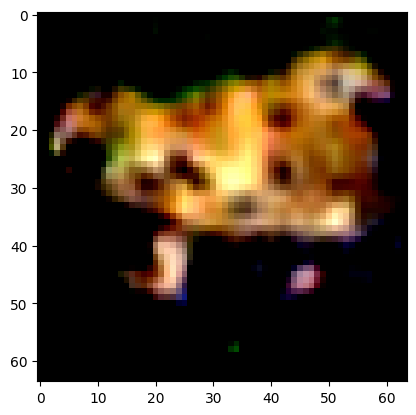

In [12]:
image = torch.permute(train_set[0][0],(1,2,0))
image.shape

plt.imshow(image) 
train_set[0][1]

### 2.2. Create dataloader for train, val, test

In [13]:
batch_size = 256 #keeping it binary so it fits GPU

#Dataloader(dataset,batch_size, shuffle)
train_loader = DataLoader(train_set,batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set,batch_size=batch_size, shuffle=True)

### 2.3 Test to the dataloader

In [14]:
for image,label in train_loader:
    print(image.shape) #what is the shape (100,3,32,32) == (batch_size, C, W, H)
    print(label.shape) #what is the shape (100)
    break

torch.Size([256, 3, 64, 64])
torch.Size([256])


In [15]:
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
print(device)

cuda:0


In [16]:
model.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

## 3.Training

In [17]:
#define loss
criterion = nn.CrossEntropyLoss().to(device)
#define optimizer
optimizer = torch.optim.SGD(model.parameters(),lr=0.005,momentum=0.9)

train_losses = []
train_accs = []
val_losses   = []
val_accs = []
val_corr = []

In [18]:
import time
val_old_loss = float("inf")
filepath = './models/Cifa10AlexNet.pt'
epochs = 20
for e in range(epochs): #for epoch 20

    train_total = 0
    total_train_corr = 0

    model.train()
    start_time = time.time()
    for batch, (image,label) in enumerate(train_loader):  #for trainloader
        image = image.to(device) #put image and label to device
        label = label.to(device)
        #Forward pass
        yhat = model(image) #1.predict
        loss = criterion(yhat,label) #2.loss


        #add Accuracy
        train_losses.append(loss)
        predicted = torch.max(yhat,1)[1]
        train_total += label.size(0)  #keep track of total number of samples
        bacth_train_corr = (predicted == label).sum().item()
        total_train_corr += bacth_train_corr

        #Backward and optimize
        optimizer.zero_grad() #3.clear gradient
        loss.backward() #4.backpropagate
        optimizer.step() #5.update

        #print the loss and acc if epoch / 1
        train_acc = (total_train_corr * 100) / (batch_size*(batch+1)) #train_total
        train_accs.append(train_acc)

        end_time = time.time()
        epoch_mins, epoch_secs = epoch_time(start_time, end_time)
        #print the loss
        if (batch+1) % 100 == 1:
            # sys.stdout.write(f'Batch: {batch+1} - Loss: {loss:.4f} ')
            print(f'Epoch : {e} | Batch Step : {batch:3.0f} | Train loss : {loss:.2f} | Acc : {train_acc:.2f} | Time : {epoch_mins}m {epoch_secs}s')
    
    #After each epoch , calculate the validation acc and loss
    model.eval()
    
    with torch.no_grad():

        total_val_corr = 0

        for (val_image,val_label) in val_loader:
            val_image = val_image.to(device) #put image and label to device
            val_label = val_label.to(device)

            val_yhat = model(val_image)
            val_loss = criterion(val_yhat,val_label)
            
            val_predicted = torch.max(val_yhat, 1)[1]
            total_val_corr += (val_predicted == val_label).sum()
            
        val_acc = (total_val_corr * 100) / len(val_set)

            # break # I only do validation on 1 batch of Validation set for faster training time

    val_accs.append(val_acc)
    val_losses.append(val_loss)

    #save the model with the lowest loss
    if val_loss < val_old_loss:
        # val_old_loss = val_loss
        torch.save(model.state_dict(), filepath) #state_dict is simple the weights
    
    print(f'++++++Validation++++++ : Val_loss : {val_loss:.2f} | Acc: {val_acc:.2f} | Time : {epoch_mins}m {epoch_secs}s')

Epoch : 0 | Batch Step :   0 | Train loss : 2.37 | Acc : 12.11 | Time : 0m 0s
Epoch : 0 | Batch Step : 100 | Train loss : 0.96 | Acc : 58.86 | Time : 0m 13s
++++++Validation++++++ : Val_loss : 0.70 | Acc: 71.55 | Time : 0m 18s
Epoch : 1 | Batch Step :   0 | Train loss : 0.72 | Acc : 73.83 | Time : 0m 0s
Epoch : 1 | Batch Step : 100 | Train loss : 0.72 | Acc : 73.77 | Time : 0m 13s
++++++Validation++++++ : Val_loss : 0.73 | Acc: 75.12 | Time : 0m 18s
Epoch : 2 | Batch Step :   0 | Train loss : 0.67 | Acc : 76.95 | Time : 0m 0s
Epoch : 2 | Batch Step : 100 | Train loss : 0.70 | Acc : 77.21 | Time : 0m 13s
++++++Validation++++++ : Val_loss : 0.54 | Acc: 77.13 | Time : 0m 18s
Epoch : 3 | Batch Step :   0 | Train loss : 0.56 | Acc : 80.86 | Time : 0m 0s
Epoch : 3 | Batch Step : 100 | Train loss : 0.60 | Acc : 79.77 | Time : 0m 13s
++++++Validation++++++ : Val_loss : 0.62 | Acc: 78.07 | Time : 0m 18s
Epoch : 4 | Batch Step :   0 | Train loss : 0.60 | Acc : 75.39 | Time : 0m 0s
Epoch : 4 | Ba

### 3.1 Plot the loss and Accuracy 

In [20]:
train_losses = [loss.item() for loss in train_losses]
train_accs   = [acc.item()  for acc  in train_accs]
val_losses   = [loss.item() for loss in val_losses]
val_accs     = [acc.item()  for acc  in val_accs]

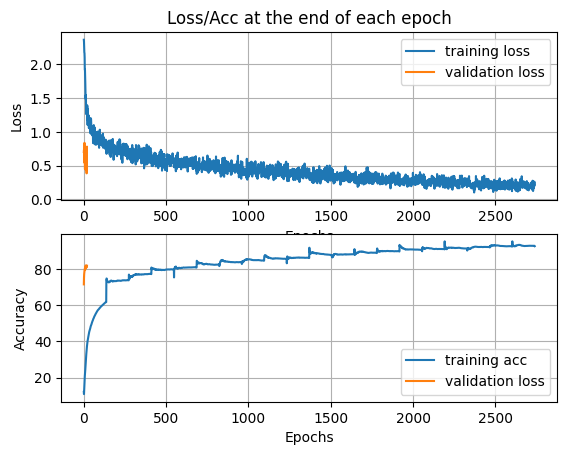

In [47]:
plt.subplot(2,1,1)
plt.plot(train_losses, label='training loss')
plt.plot(val_losses, label='validation loss')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.grid()
plt.title('Loss/Acc at the end of each epoch')
plt.subplot(2,1,2)
plt.plot(train_accs, label='training acc')
plt.plot(val_accs, label='validation loss')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.grid()

### 3.2 Check which image we got wrong ..... with confusion matrix 
- even print out the image we predict wrong.....

In [ ]:
# classes of CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'fog', 'horse', 'ship', 'truck']

## 4. Testing

In [100]:
#load the best model based on val loss
# model = model().to(device)
model.load_state_dict(torch.load(filepath)) #load the best model

total_test_loss = 0
test_total = 0

with torch.no_grad():
    test_corr = 0 

    for batch, (test_image, test_label) in enumerate(test_loader):
        test_image = test_image.to(device)
        test_label = test_label.to(device)

        test_yhat = model(test_image)
        test_loss = criterion(test_yhat, test_label)

        test_predicted = torch.max(test_yhat, 1)[1]
        test_corr += (test_predicted == test_label).sum().item()
        
        total_test_loss += test_loss.item()

    test_loss = total_test_loss / len(test_loader)
    test_acc = (test_corr * 100) / len(test_set)
           
print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc:.2f}%') 

Test Loss: 0.600 | Test Acc: 82.22%


### Display the incorrectly clasified images

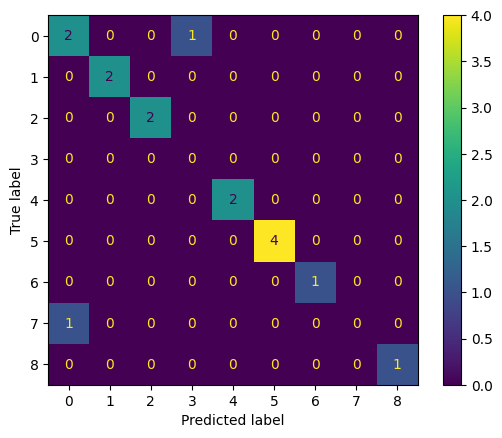

In [102]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import pandas as pd
# classes of CIFAR-10a
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'fog', 'horse', 'ship', 'truck']
# disp = confusion_matrix(test_predicted.cpu().numpy(), test_label.cpu().numpy())
# df_cm = pd.DataFrame(disp)
# plt.figure(figsize = (9,6))
# sns.heatmap(df_cm, annot=True, fmt="d", cmap='BuGn')
# plt.xlabel("prediction")
# plt.ylabel("label (ground truth)")
# plt.show()

disp = ConfusionMatrixDisplay(confusion_matrix(test_predicted.cpu().numpy(), test_label.cpu().numpy())) 
disp.plot()

# Conclusion



1. Introduction: the background and goals of the lab
- To look into deeply in AlexNet model which classifies 1000 different classes in ImageNet. We load this architecture then apply to other dataset such as CIFAR-10 (10 classes) 

2. Methods: what you did, what parameters you tried, and so on
- AlexNet provide final outputs as 1000 parameter thus it have to be changed 10 classes according with cifar-10

- Due to different size, I has preprocessed as 
    - Resize(70),
    - RandomCrop(64),
    - RandomHorizontalFlip(),
    - ToTensor(),
    - Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

- Hyperparameter using : 
    - learing rate = 0.005
    - batch_size = 256
    - SGD with momentum = 0.9
    - Cross Entropy Loss Function
3. Results: what were the results
- Train loss : 0.18 | Acc : 95.31 | Time : 0m 0s
- Train loss : 0.21 | Acc : 92.86 | Time : 0m 13s
- Val_loss   : 0.78 | Acc: 81.88  | Time : 0m 17s

4. Conclusion: what did you learn from the lab, and what might be the next steps
- I learned is as follow :
    - Set up remote SSH to use GPU from puffer and also about images, dockers and containers
    - Load pre-tained model then adapt different outputs with other datasets
